## Boosting Algorithm
Boosting algorithm is a machine learning algorithm that can be used for both classification and regression problems. It is a meta-al
gorithm that combines several weak learners to create a strong learner. The weak learners are typically simple models such
as decision trees or linear models, but they can also be more complex models such as neural networks.

In [6]:
!pip install xgboost -q

In [14]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [15]:
# import the dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

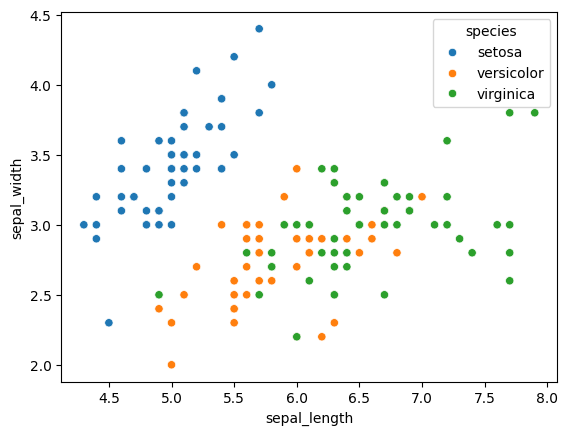

In [16]:
# plot the data as scatter plot
sns.scatterplot(x='sepal_length', y='sepal_width', hue = 'species', data=df)

In [17]:
X = df.drop('species', axis=1)
y = df['species']

# label encoding
le = LabelEncoder()
X['sepal_length'] = le.fit_transform(X['sepal_length'])
X['sepal_width'] = le.fit_transform(X['sepal_width'])
X['petal_length'] = le.fit_transform(X['petal_length'])
X['petal_width'] = le.fit_transform(X['petal_width'])
y = le.fit_transform(y)
# train-test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# predict the test set results
y_pred = dt.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred, average='micro'))
print("F1 Score:", f1_score(y_test, y_pred, average='micro'))
print("Precision Score", precision_score(y_test, y_pred, average='micro'))

Accuracy Score: 0.9333333333333333
Recall Score: 0.9333333333333333
F1 Score: 0.9333333333333333
Precision Score 0.9333333333333333


In [19]:
%%time
# train the random tree forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# predict the test data
y_pred = rf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred, average='micro'))
print("F1 Score:", f1_score(y_test, y_pred, average='micro'))
print("Precision Score", precision_score(y_test, y_pred, average='micro'))

Accuracy Score: 0.9333333333333333
Recall Score: 0.9333333333333333
F1 Score: 0.9333333333333333
Precision Score 0.9333333333333333
CPU times: total: 172 ms
Wall time: 195 ms


In [20]:
# train the XGboost classifier
Xg = XGBClassifier()
Xg.fit(X_train, y_train)
# predict the test set results
y_pred = Xg.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred, average='micro'))
print("F1 Score:", f1_score(y_test, y_pred, average='micro'))
print("Precision Score", precision_score(y_test, y_pred, average='micro'))


Accuracy Score: 0.9333333333333333
Recall Score: 0.9333333333333333
F1 Score: 0.9333333333333333
Precision Score 0.9333333333333333


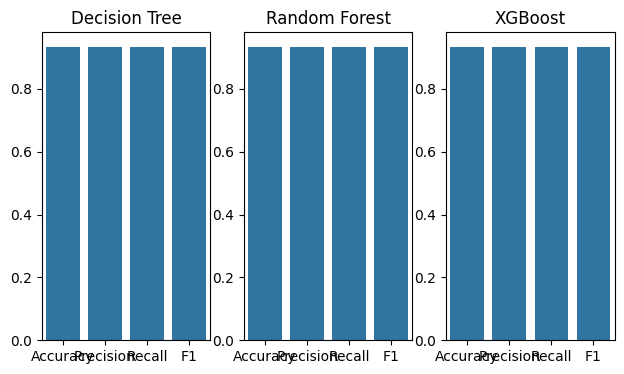

In [21]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(10, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()